In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv
/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/ka

In [2]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2016.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012016  2016           1          1         1   
1  01-01-01-201900000022016  2016           1          1         1   
2  01-01-01-201900000032016  2016           1          1         1   
3  01-01-01-201900000042016  2016           1          1         1   
4  01-01-01-201900000052016  2016           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000032016  chief judicial magistrate           0 male   
1  MHNB030000042016  chief judicial magistrate           0 male   
2  MHNB030000052016  chief judicial magistrate           0 male   
3  MHNB030000062016  chief judicial magistrate           0 male   
4  MHNB030000072016  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0     1940.0         767.0   
1            0 m

In [3]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  01-27-01-201200001892016  2016           1         27         1   
900404  01-27-01-201200001902016  2016           1         27         1   
900405  01-27-01-201200001912016  2016           1         27         1   
900406  01-27-01-201200001922016  2016           1         27         1   
900407  01-27-01-201200001932016  2016           1         27         1   
900408  01-27-01-201200001942016  2016           1         27         1   
900409  01-27-01-201200001952016  2016           1         27         1   
900410  01-27-01-201200001962016  2016           1         27         1   
900411  01-27-01-201200001972016  2016           1         27         1   
900412  01-27-01-201200001982016  2016           1         27         1   
900413  01-27-01-201200001992016  2016           1         27         1   
900414  01-27-01-201200002002016  2016           1         27         1   
900415  01-27-01-20120000

In [5]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [6]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [7]:
print(state_x)

[[22, 'Punjab'], [7, 'Jharkhand'], [19, 'Mizoram'], [15, 'Uttarakhand'], [20, 'Tripura'], [23, 'Madhya Pradesh'], [32, 'DNH at Silvasa'], [33, 'Ladakh'], [1, 'Maharashtra'], [25, 'Manipur'], [16, 'West Bengal'], [9, 'Rajasthan'], [27, 'Chandigarh'], [14, 'Haryana'], [3, 'Karnataka'], [6, 'Assam'], [17, 'Gujarat'], [31, 'Diu and Daman'], [26, 'Delhi'], [18, 'Chhattisgarh'], [8, 'Bihar'], [12, 'Jammu and Kashmir'], [24, 'Sikkim'], [13, 'Uttar Pradesh'], [29, 'Telangana'], [11, 'Orissa'], [2, 'Andhra Pradesh'], [5, 'Himachal Pradesh'], [4, 'Kerala'], [30, 'Goa'], [21, 'Meghalaya'], [10, 'Tamil Nadu']]


In [8]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [9]:
print(states)

    state_code              state
0           22             Punjab
1            7          Jharkhand
2           19            Mizoram
3           15        Uttarakhand
4           20            Tripura
5           23     Madhya Pradesh
6           32     DNH at Silvasa
7           33             Ladakh
8            1        Maharashtra
9           25            Manipur
10          16        West Bengal
11           9          Rajasthan
12          27         Chandigarh
13          14            Haryana
14           3          Karnataka
15           6              Assam
16          17            Gujarat
17          31      Diu and Daman
18          26              Delhi
19          18       Chhattisgarh
20           8              Bihar
21          12  Jammu and Kashmir
22          24             Sikkim
23          13      Uttar Pradesh
24          29          Telangana
25          11             Orissa
26           2     Andhra Pradesh
27           5   Himachal Pradesh
28           4

In [10]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [11]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  01-27-01-200300002162016  2016           1         27         1   
899395  01-27-01-200300002172016  2016           1         27         1   
899396  01-27-01-200300002182016  2016           1         27         1   
899397  01-27-01-200300002192016  2016           1         27         1   
899398  01-27-01-200300002202016  2016           1         27         1   
...                          ...   ...         ...        ...       ...   
899996  01-27-01-200900000472016  2016           1         27         1   
899997  01-27-01-200900000482016  2016           1         27         1   
899998  01-27-01-200900000492016  2016           1         27         1   
899999  01-27-01-200900000502016  2016           1         27         1   
900000  01-27-01-200900000512016  2016           1         27         1   

                    cino               judge_position female_defendant  \
899394  MHBI010034202016 

In [12]:
state_count = mer_2.groupby('state').count().reset_index()

In [13]:
print(state_count)

                state  ddl_case_id     year  state_code  dist_code  court_no  \
0      Andhra Pradesh       273082   273082      273082     273082    273082   
1               Assam       155943   155943      155943     155943    155943   
2               Bihar       389051   389051      389051     389051    389051   
3          Chandigarh        29782    29782       29782      29782     29782   
4        Chhattisgarh       179927   179927      179927     179927    179927   
5      DNH at Silvasa         1006     1006        1006       1006      1006   
6               Delhi       308537   308537      308537     308537    308537   
7       Diu and Daman         1589     1589        1589       1589      1589   
8                 Goa        31481    31481       31481      31481     31481   
9             Gujarat       735394   735394      735394     735394    735394   
10            Haryana       572847   572847      572847     572847    572847   
11   Himachal Pradesh       110985   110

In [14]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id     year  state_code  dist_code  \
0           Andhra Pradesh       273082   273082      273082     273082   
1                    Assam       155943   155943      155943     155943   
2                    Bihar       389051   389051      389051     389051   
3               Chandigarh        29782    29782       29782      29782   
4             Chhattisgarh       179927   179927      179927     179927   
5   Dadara & Nagar Havelli         1006     1006        1006       1006   
6             NCT of Delhi       308537   308537      308537     308537   
7              Daman & Diu         1589     1589        1589       1589   
8                      Goa        31481    31481       31481      31481   
9                  Gujarat       735394   735394      735394     735394   
10                 Haryana       572847   572847      572847     572847   
11        Himachal Pradesh       110985   110985      110985     110985   
12         Jammu & Kashmi

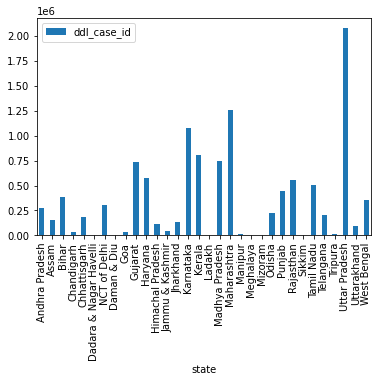

In [15]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2016.png')

In [16]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [17]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

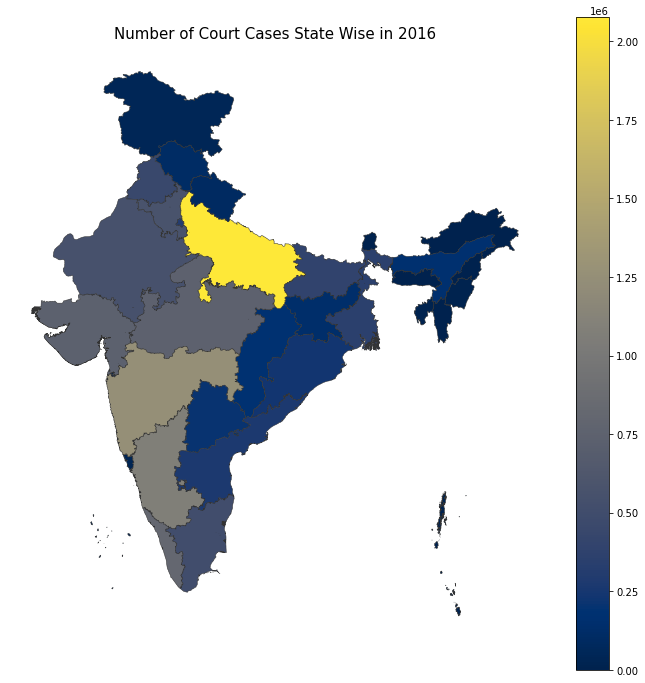

In [18]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2016',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2016.png')

In [19]:
state_2016 = state_map.iloc[:,[1]]
print(state_2016)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                        155943.0
Bihar                        389051.0
Chandigarh                    29782.0
Chhattisgarh                 179927.0
Dadara & Nagar Havelli         1006.0
Daman & Diu                    1589.0
Goa                           31481.0
Gujarat                      735394.0
Haryana                      572847.0
Himachal Pradesh             110985.0
Jammu & Kashmir               42756.0
Jharkhand                    130751.0
Karnataka                   1074358.0
Kerala                       809819.0
Lakshadweep                       0.0
Madhya Pradesh               743362.0
Maharashtra                 1253768.0
Manipur                       15727.0
Meghalaya                      5260.0
Mizoram                        1039.0
Nagaland                          0.0
NCT of Delhi                 308537.0
Puducherry  

In [20]:
state_2016.to_csv('state_2016.csv')